In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pvtrace
import scintillator_tracer as st

# Verification

In [3]:
world = st.worlds.build_triangular_prism_1sipm_world()['world']
light = st.definitions.generate_scintillated_light_node(world)
light.translate((0,0,2))
scene = pvtrace.Scene(world)

vis = pvtrace.MeshcatRenderer(open_browser=True)
vis.render(scene)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7104/static/


# Grid trials

In [16]:
nodes = st.worlds.build_triangular_prism_1sipm_world()
crystal = nodes['crystal']

zrange = (
    st.geometry_helpers.min_physical_value(crystal, 'z')+5,
    st.geometry_helpers.max_physical_value(crystal, 'z')-5,
)
yrange = (
    st.geometry_helpers.min_physical_value(crystal, 'y')+1,
    st.geometry_helpers.max_physical_value(crystal, 'y')-1,
)

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7114/static/


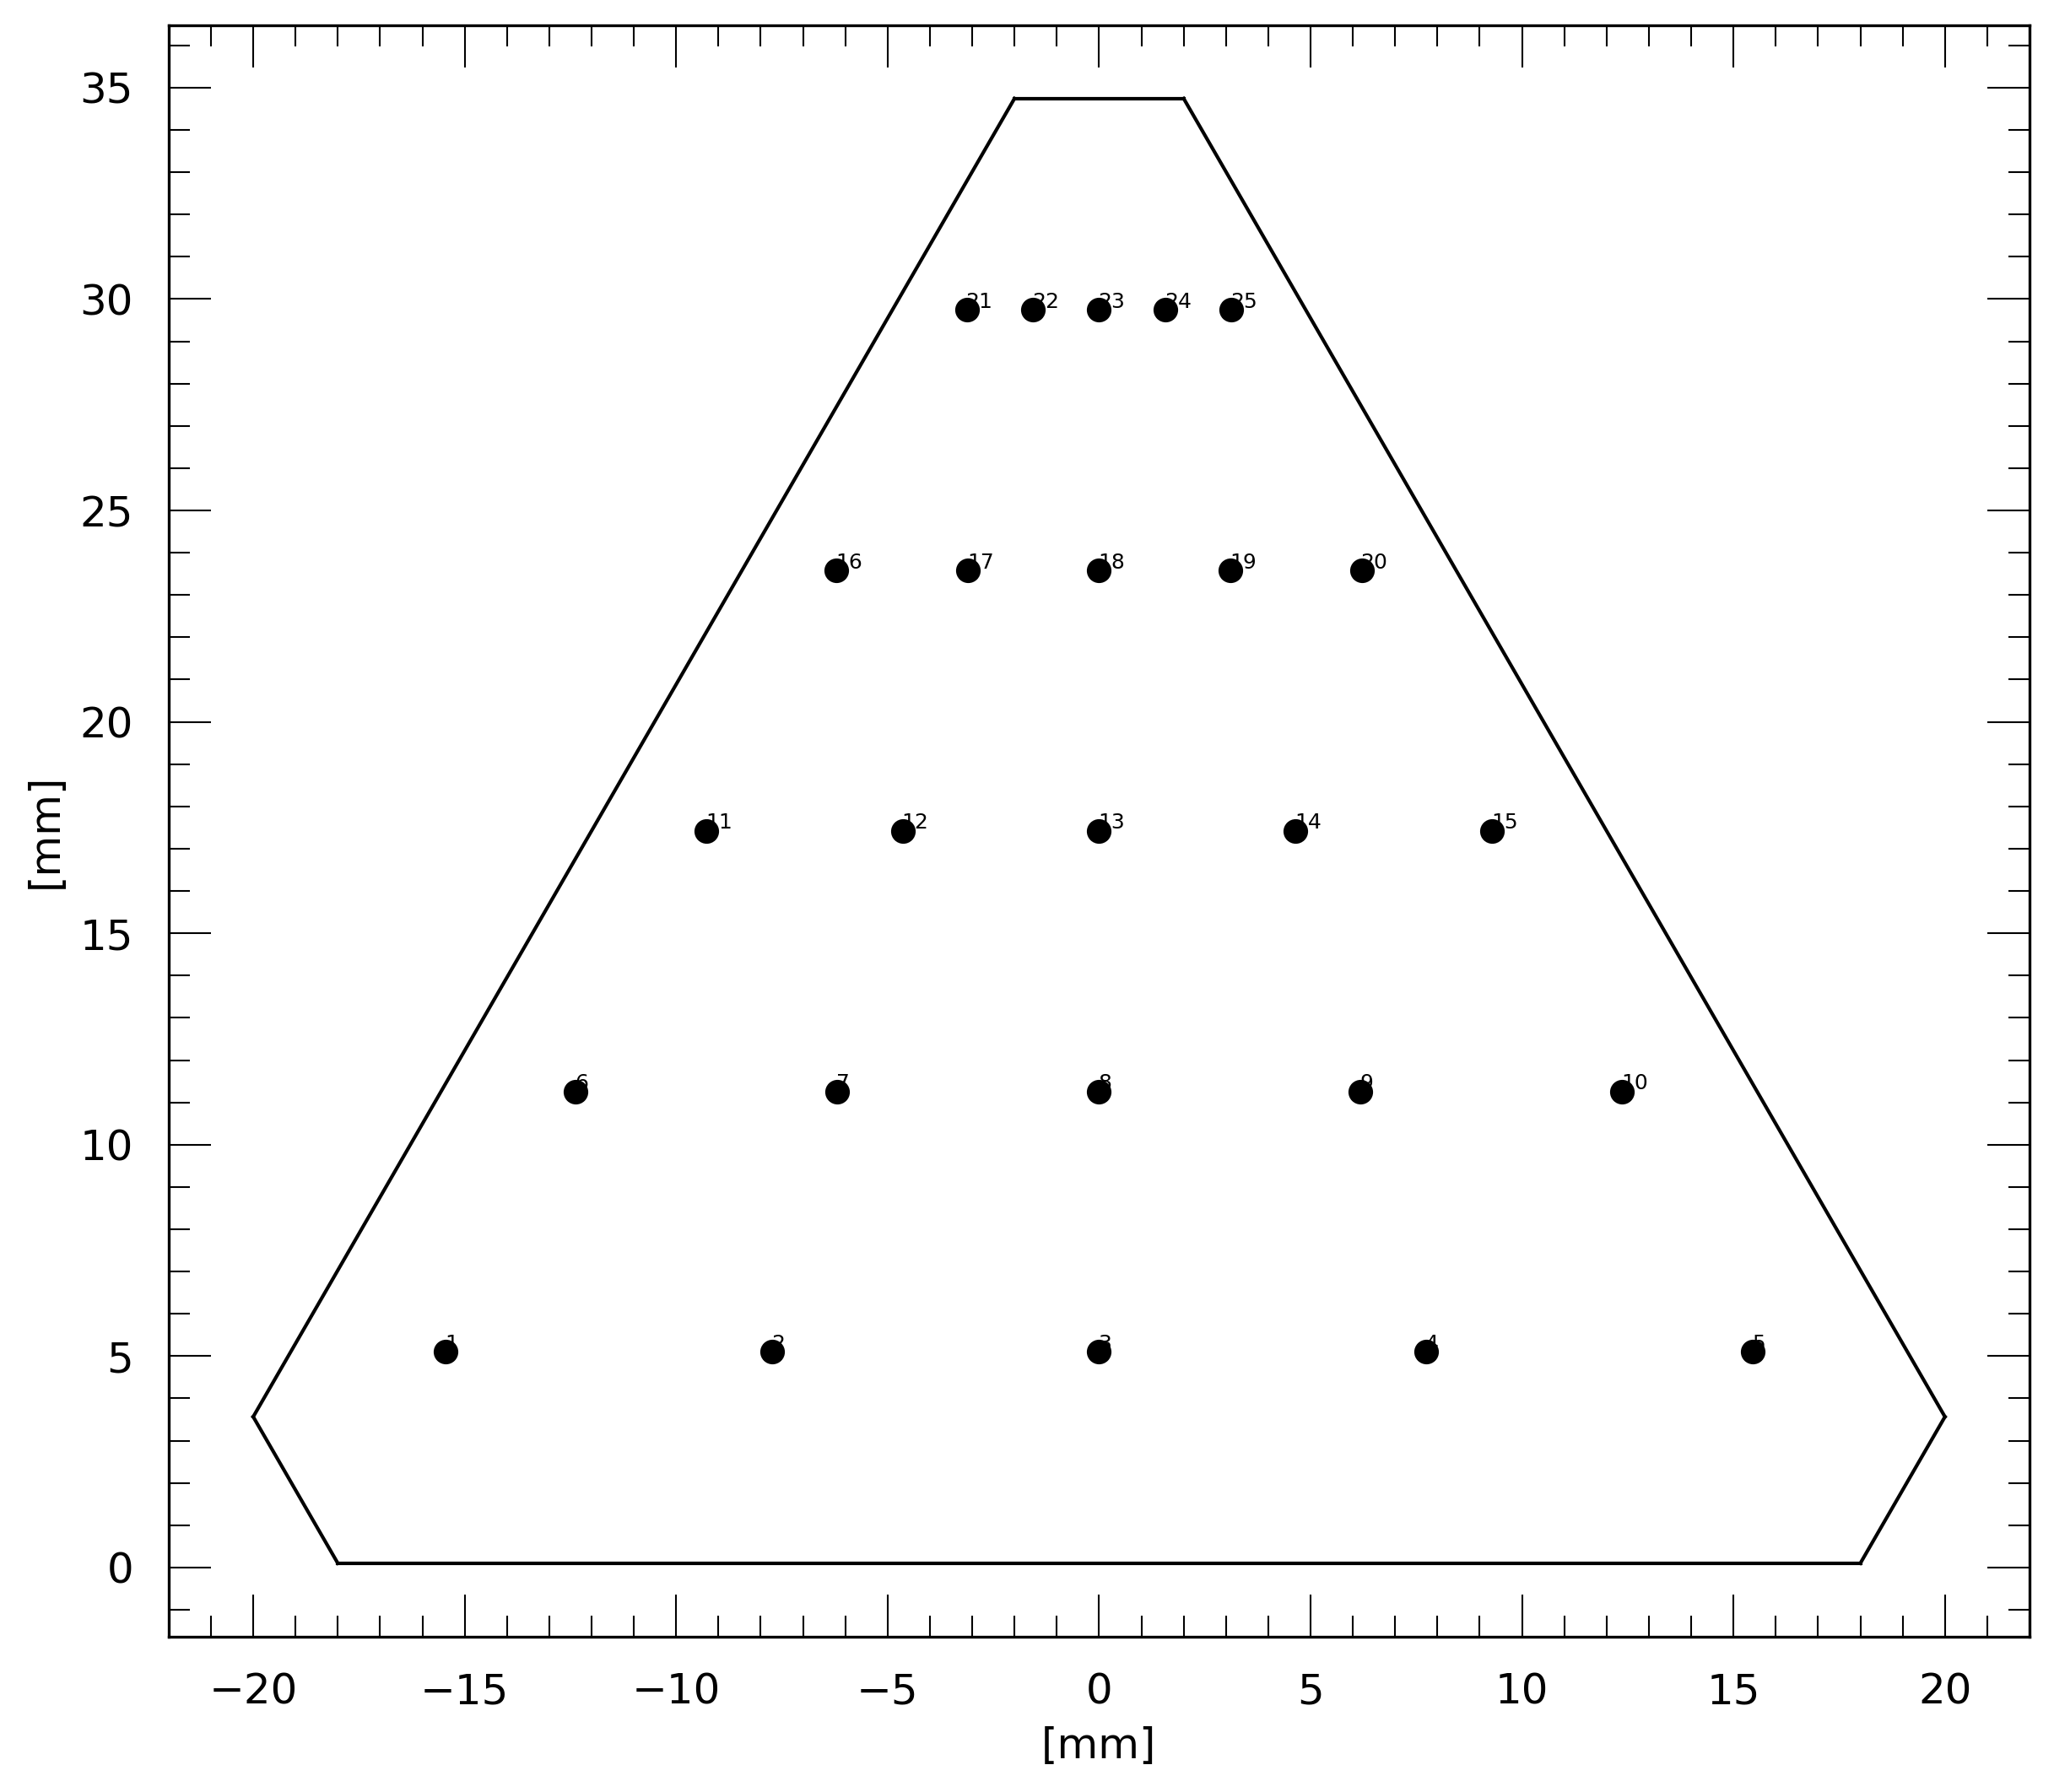

In [13]:
steps = 5
man = st.processing.Manager(st.worlds.build_triangular_prism_1sipm_world, out_dir='chamfered_triangular_prism_1sipm/')
man.define_grid(
    vertical_range=zrange,
    horizontal_func=lambda y: (0.5*y-18, -(0.5*y-18)),
    steps=steps,
    visualize=True
)

## Run

In [14]:
runs = man.run(200, seed=100, visualize=False)

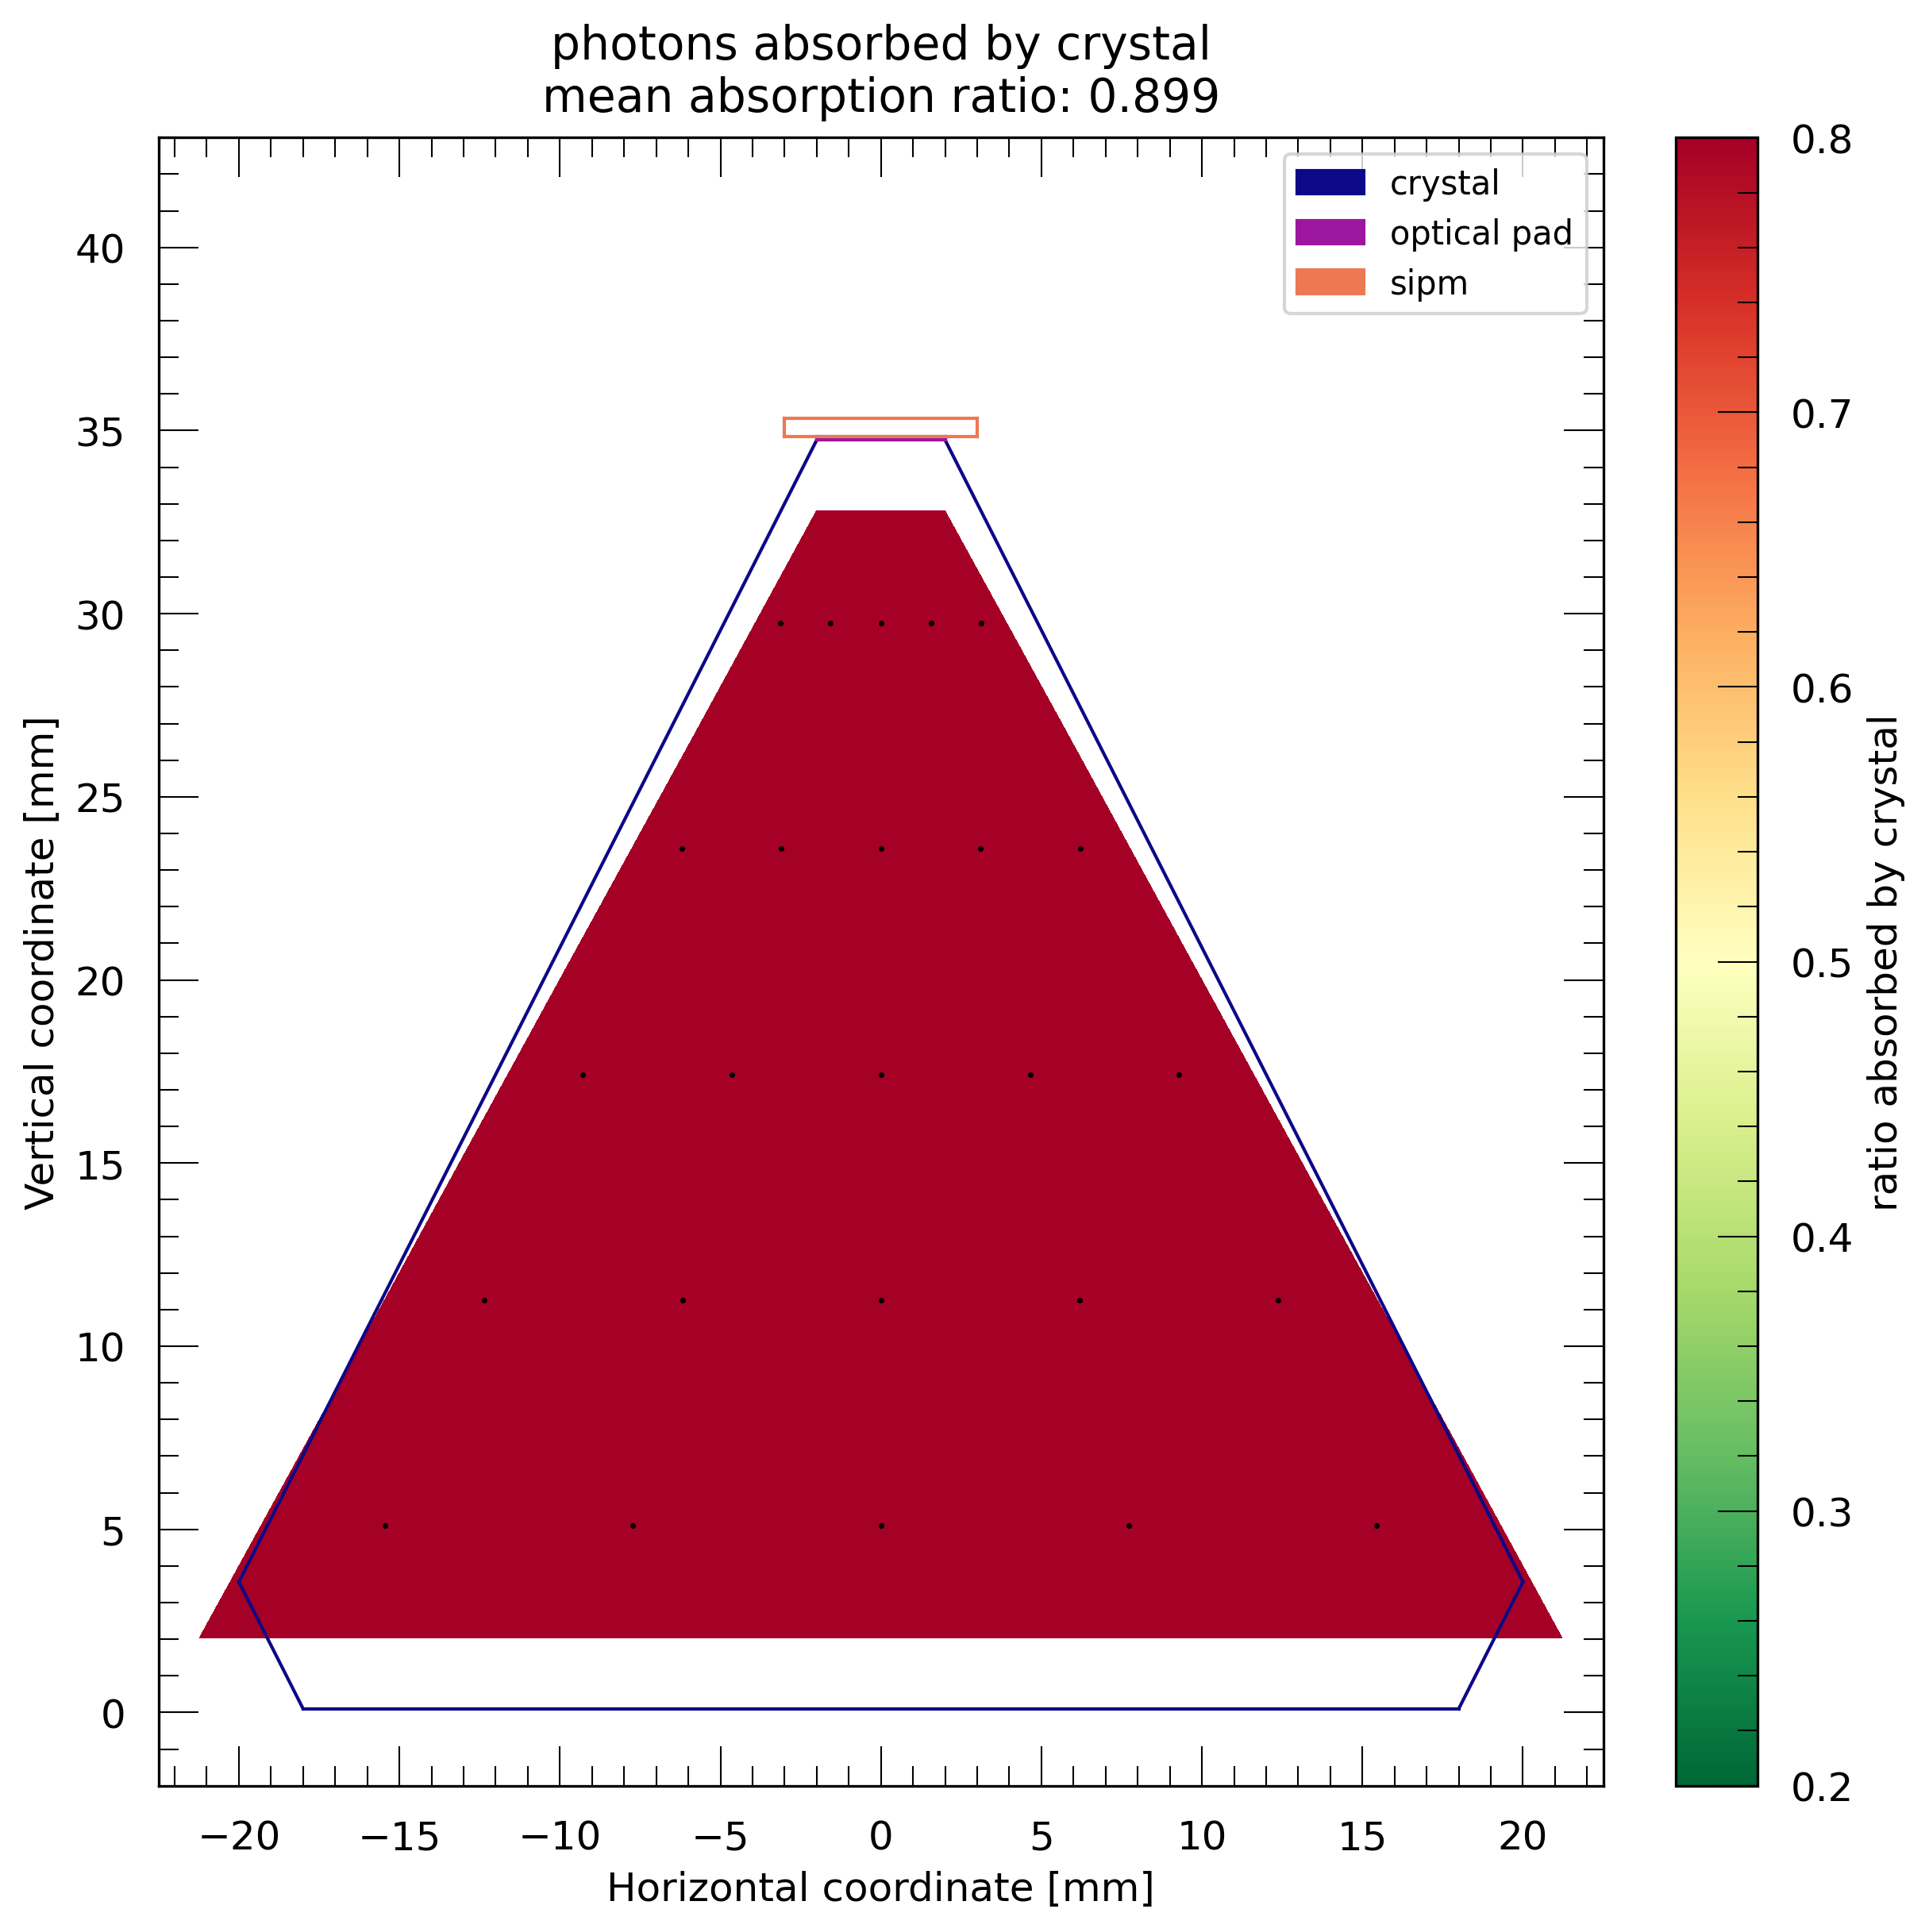

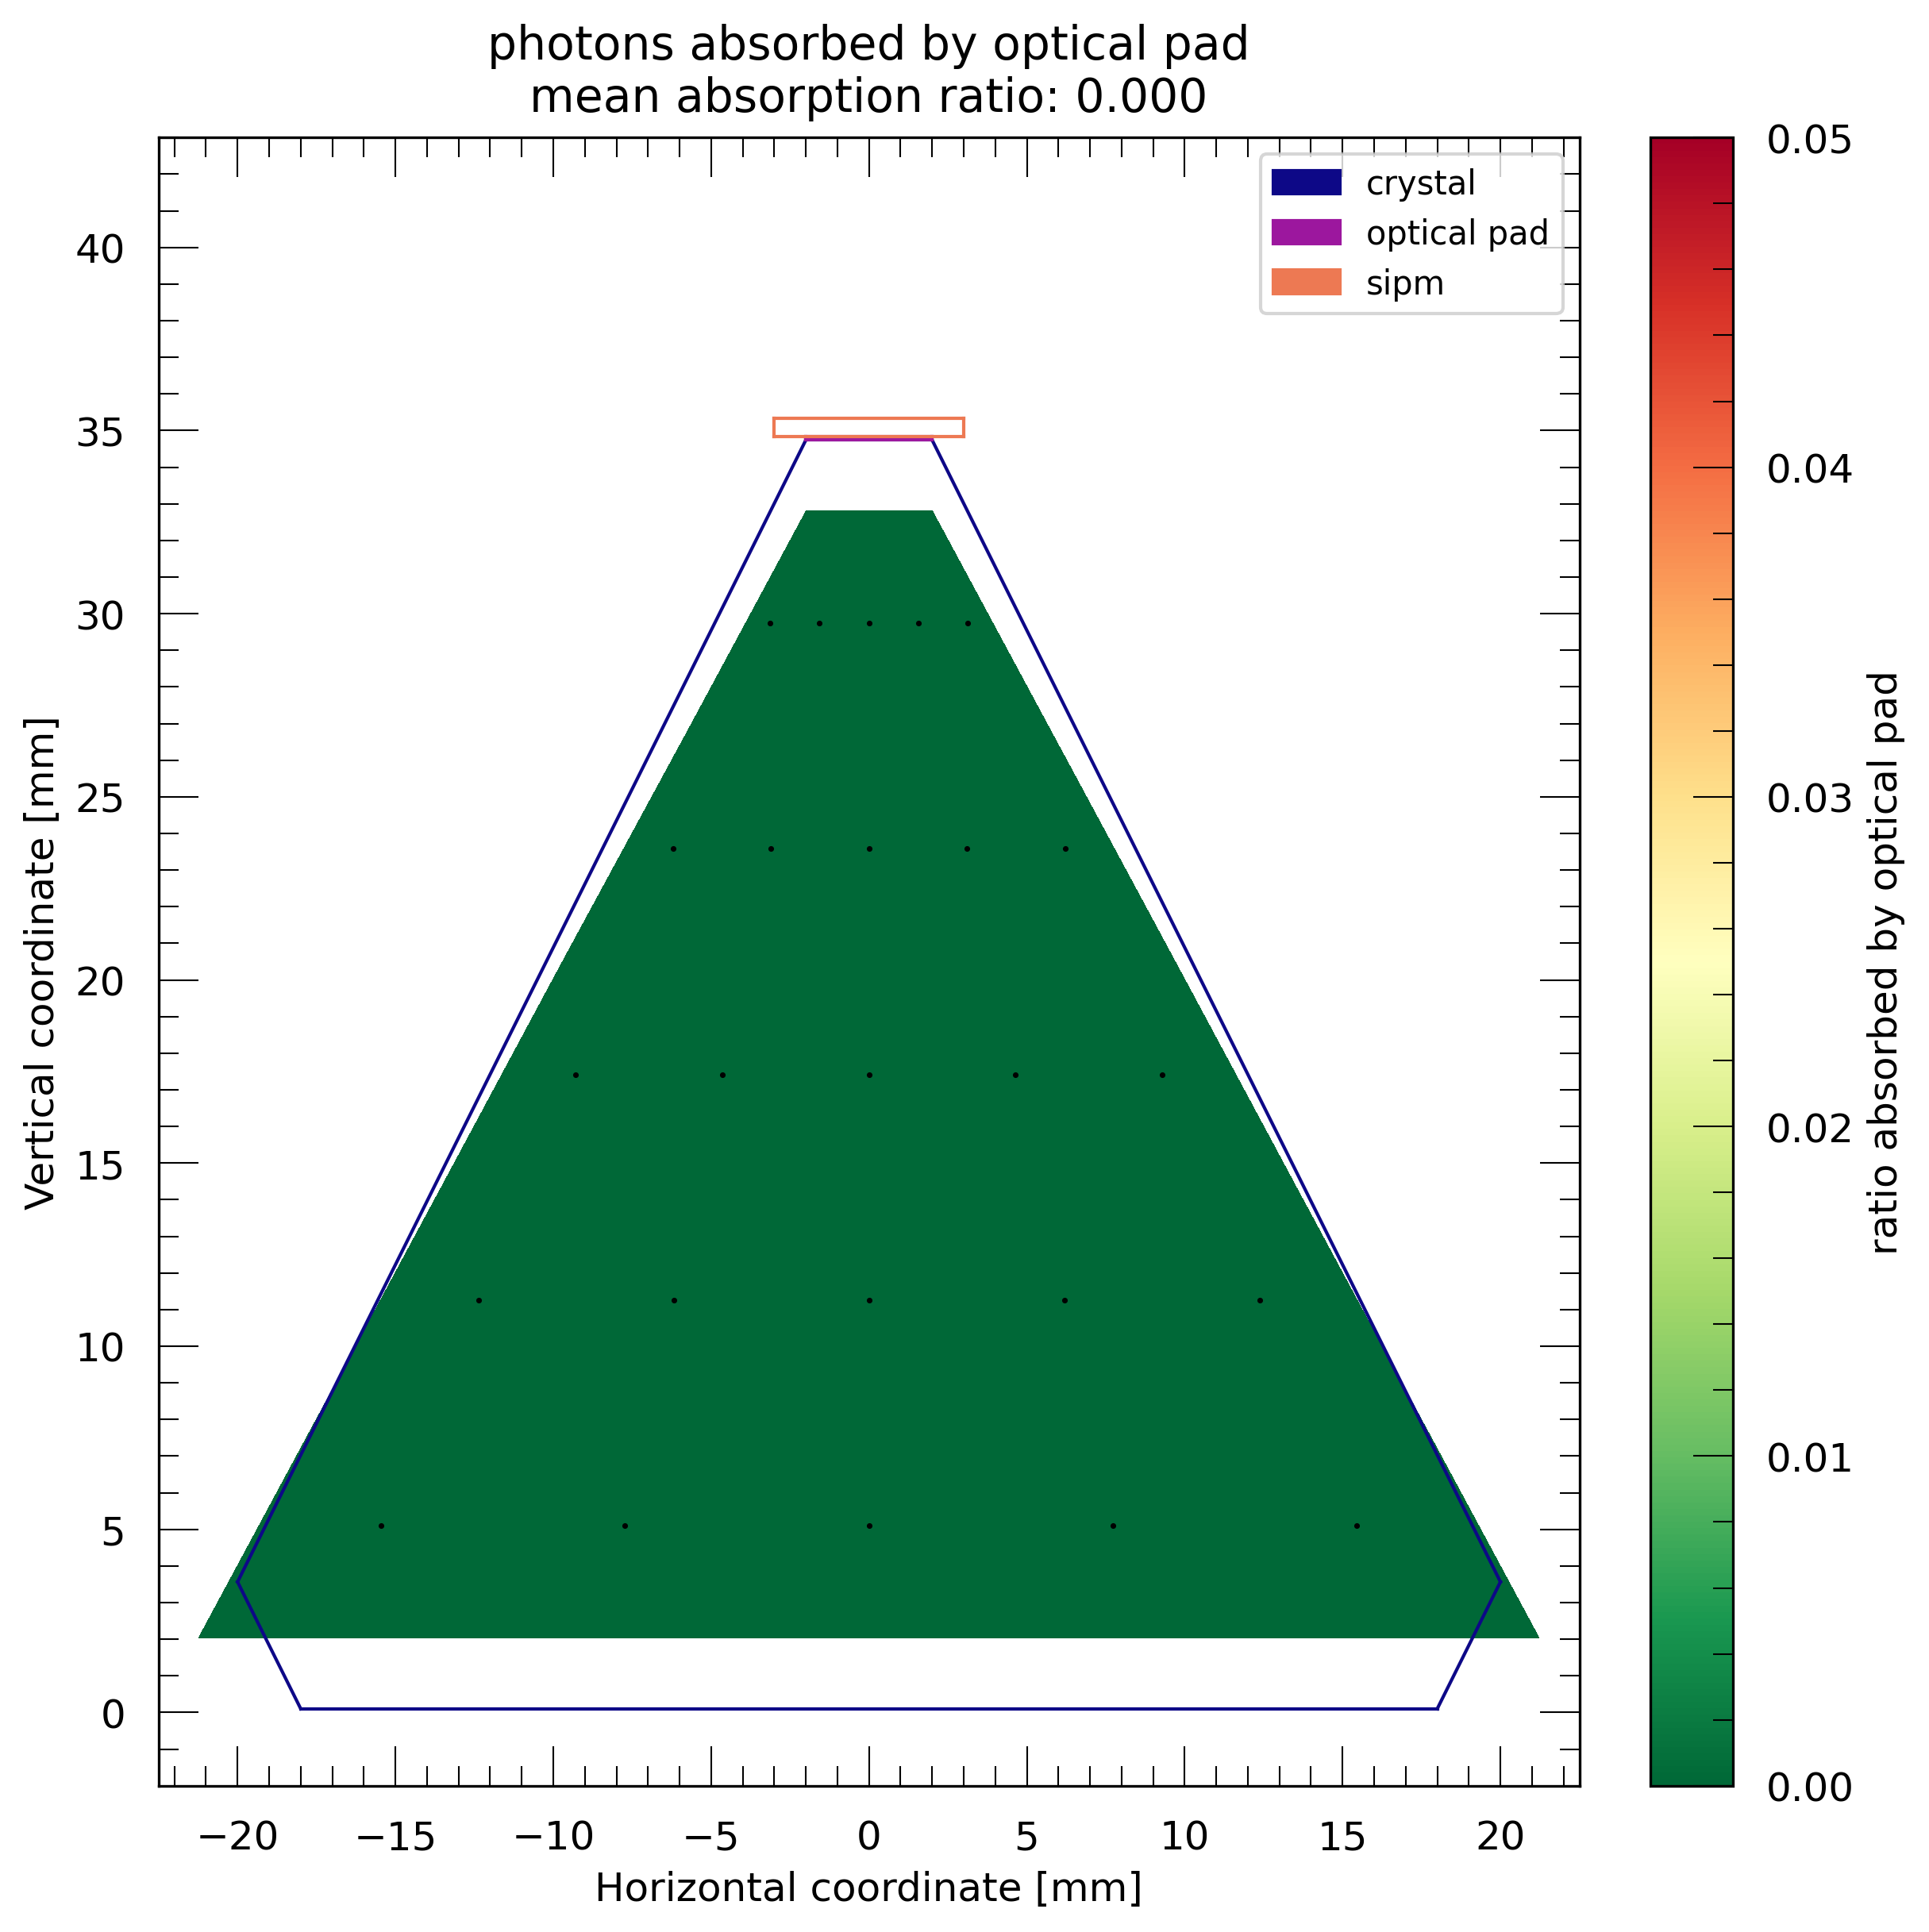

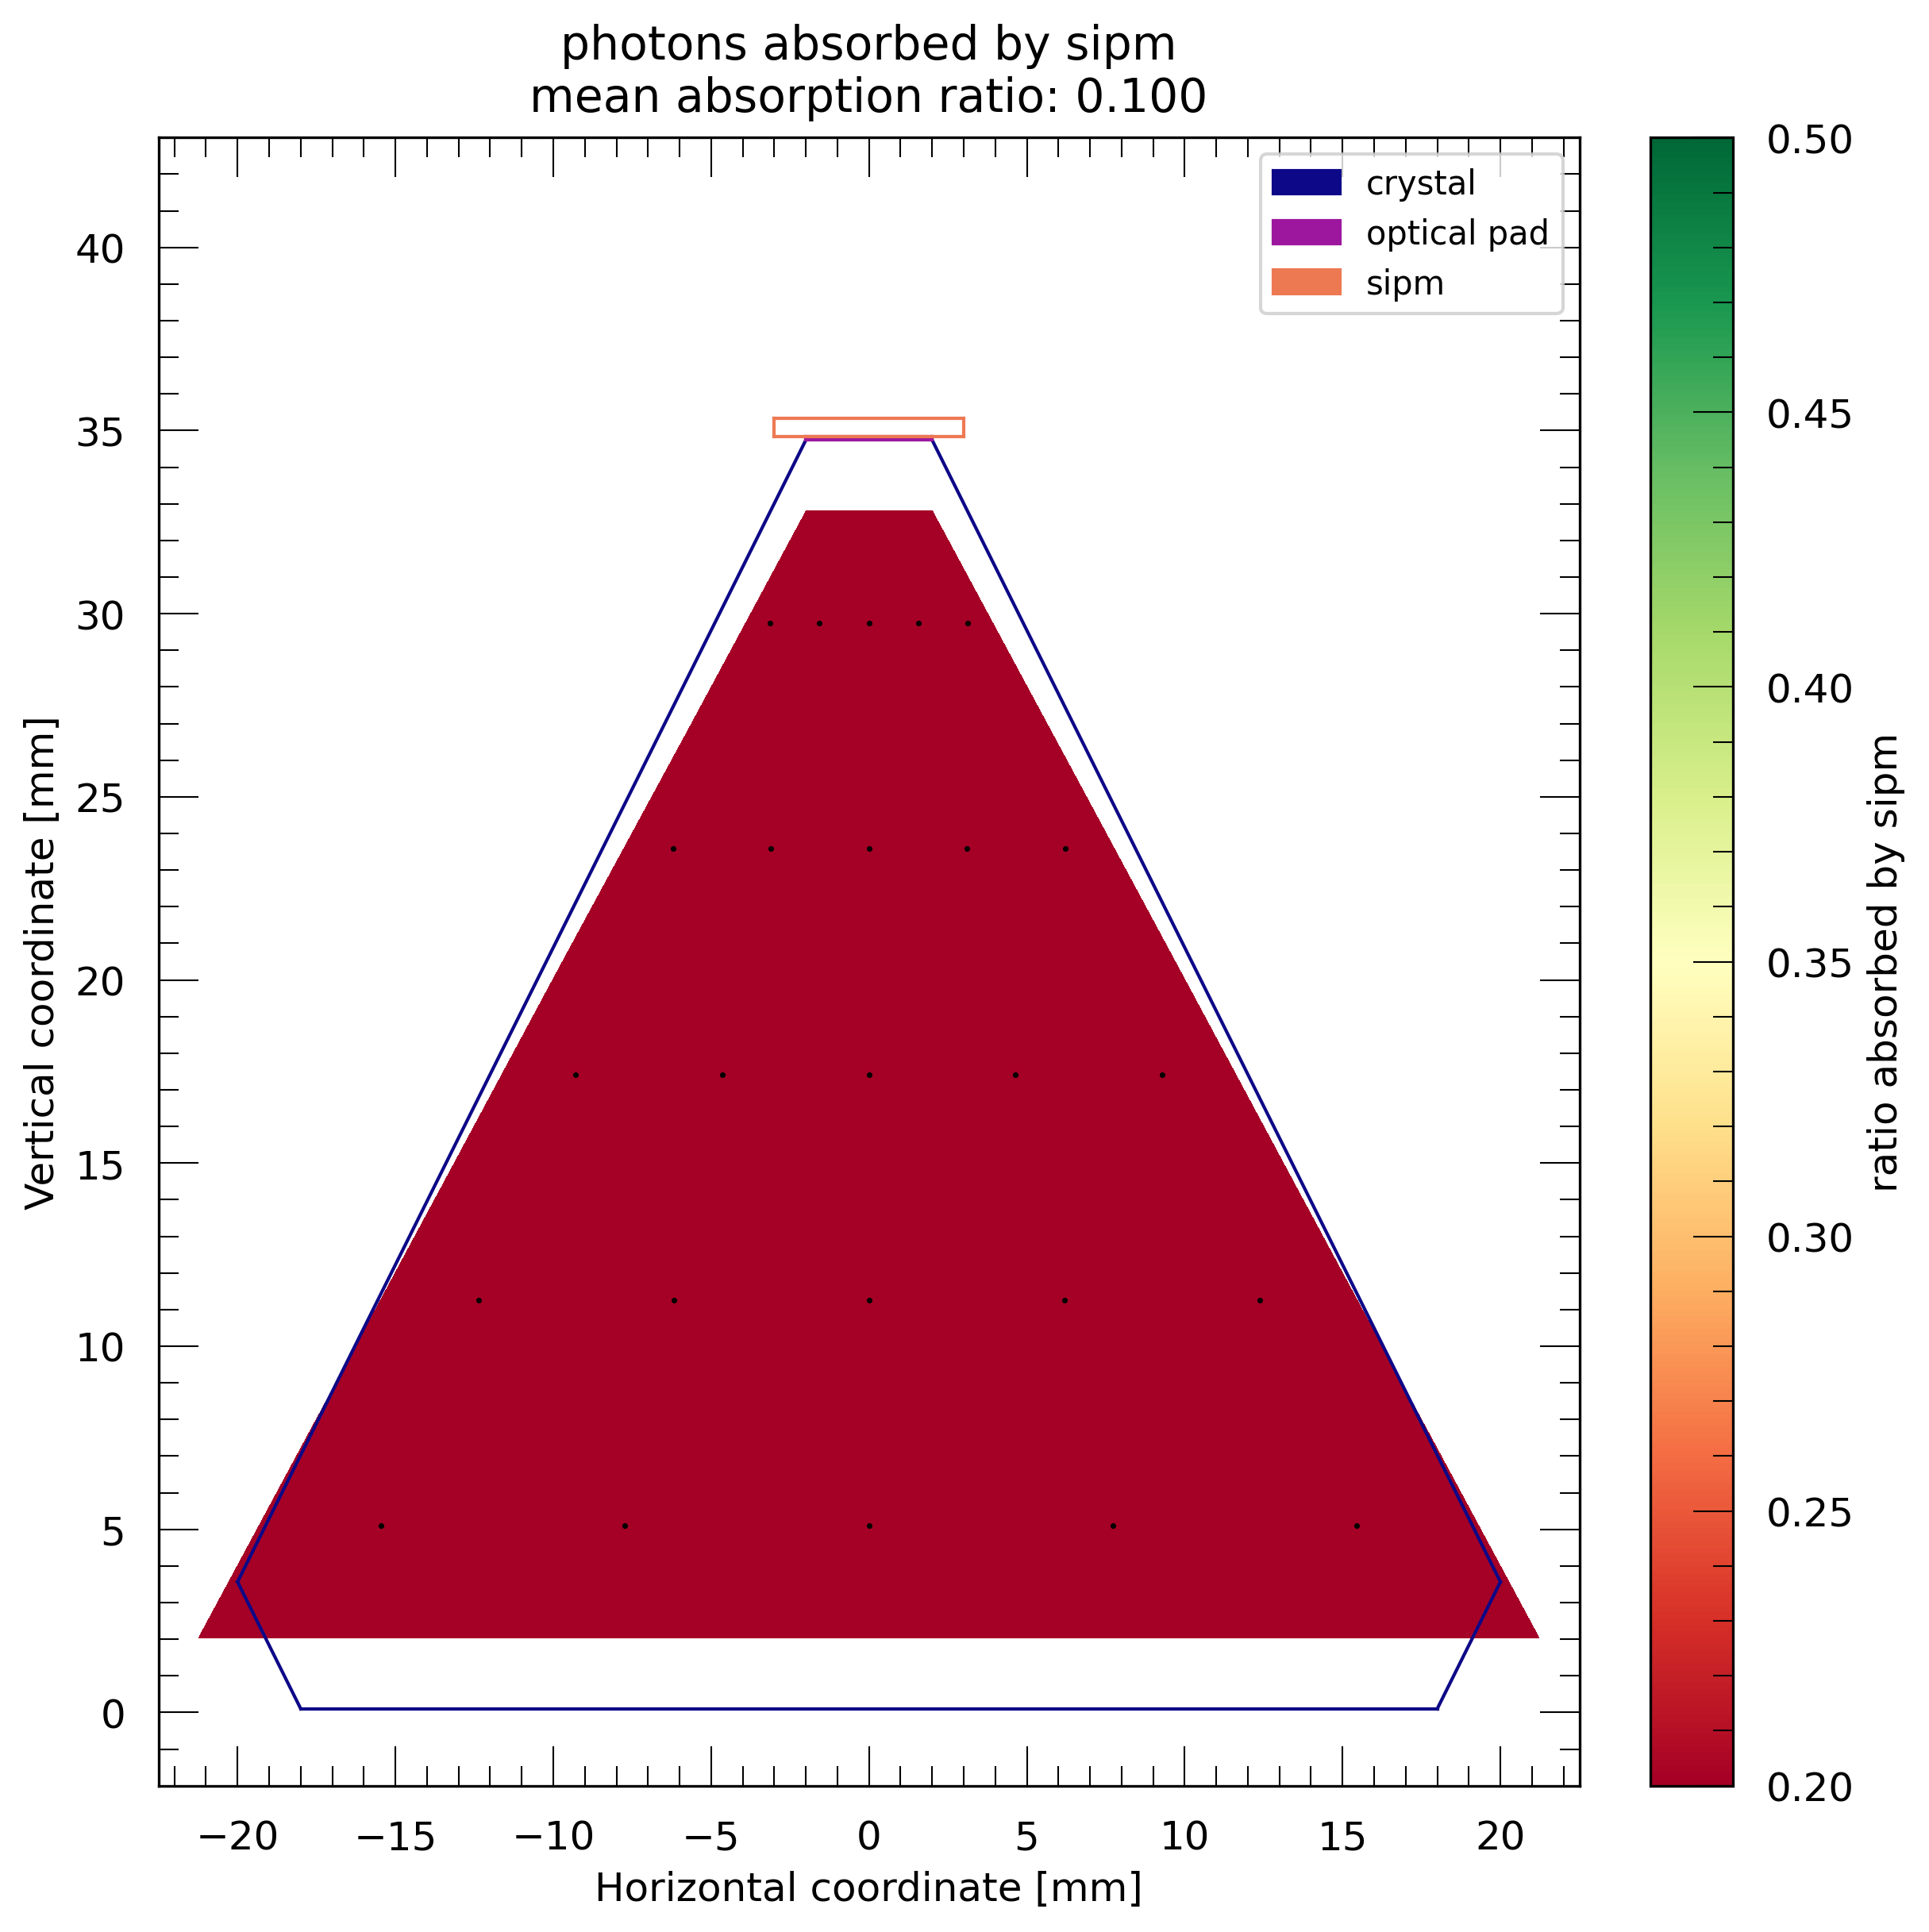

In [17]:
man.plot_all_ratios_absorbed()